In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
%%bash
wget "https://pjreddie.com/media/files/yolov3.weights"

--2023-12-29 05:50:56--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

     0K .......... .......... .......... .......... ..........  0%  283K 14m15s
    50K .......... .......... .......... .......... ..........  0%  407K 12m5s
   100K .......... .......... .......... .......... ..........  0%  357K 11m49s
   150K .......... .......... .......... .......... ..........  0%  575K 10m37s
   200K .......... .......... .......... .......... ..........  0% 1.45M 9m2s
   250K .......... .......... .......... .......... ..........  0%  573K 8m42s
   300K .......... .......... .......... .......... ..........  0%  940K 8m4s
   350K .......... .......... .......... .......... ..........  0%  578K 7m56s
   400K .......... .......... ......

In [27]:
%%bash
wget "https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg"

--2023-12-29 05:51:25--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg.1’

     0K ........                                              100% 36.1M=0s

2023-12-29 05:51:25 (36.1 MB/s) - ‘yolov3.cfg.1’ saved [8342/8342]



In [28]:
%%bash
wget "https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names"

--2023-12-29 05:51:25--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names.1’

     0K                                                       100% 32.3M=0s

2023-12-29 05:51:25 (32.3 MB/s) - ‘coco.names.1’ saved [625/625]



In [29]:
import cv2
import numpy as np
import time
import sys
import os

In [30]:
CONFIDENCE = 0.5
SCORE_THRESHOLD = 0.5
IOU_THRESHOLD = 0.5

# the neural network configuration
config_path = "yolov3.cfg"
# the YOLO net weights file
weights_path = "yolov3.weights"
# weights_path = "weights/yolov3-tiny.weights"

# loading all the class labels (objects)
labels = open("coco.names").read().strip().split("\n")
# generating colors for each object for later plotting
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype="uint8")

In [31]:
# load the YOLO network
net = cv2.dnn.readNetFromDarknet(config_path, weights_path)

In [32]:
cv2.__version__

'4.8.0'

In [33]:
image = cv2.imread("jungle.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
file_name = os.path.basename("jungle.jpg")
filename, ext = file_name.split(".")

In [34]:
image[:2].shape

(2, 640, 3)

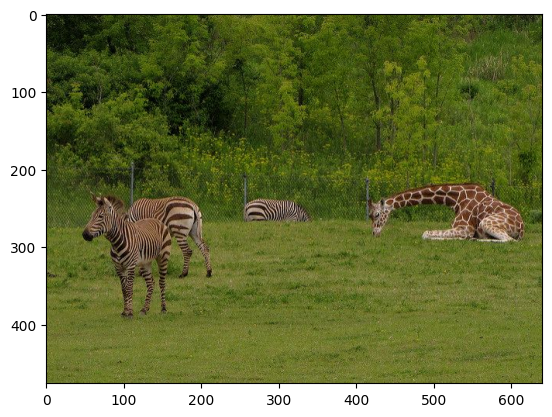

In [35]:
plt.imshow(image)

In [36]:
h, w = image.shape[:2]
# create 4D blob
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

In [37]:
blob

array([[[[0.04705882, 0.01960784, 0.06666667, ..., 0.1254902 ,
          0.07843138, 0.10980392],
         [0.00392157, 0.05882353, 0.08627451, ..., 0.07058824,
          0.07058824, 0.08235294],
         [0.01176471, 0.05098039, 0.05098039, ..., 0.02352941,
          0.10196079, 0.14901961],
         ...,
         [0.13725491, 0.15294118, 0.15294118, ..., 0.12941177,
          0.16078432, 0.13725491],
         [0.15294118, 0.16470589, 0.17254902, ..., 0.1882353 ,
          0.14901961, 0.15294118],
         [0.2       , 0.20392157, 0.21176471, ..., 0.1764706 ,
          0.17254902, 0.14509805]],

        [[0.16862746, 0.11372549, 0.18431373, ..., 0.3019608 ,
          0.27058825, 0.30980393],
         [0.10196079, 0.16862746, 0.2       , ..., 0.24313726,
          0.2627451 , 0.28627452],
         [0.11372549, 0.16470589, 0.14901961, ..., 0.1882353 ,
          0.29803923, 0.34901962],
         ...,
         [0.42745098, 0.4392157 , 0.44313726, ..., 0.42352942,
          0.46666667, 0.4

In [38]:
print("image.shape:", image.shape)
print("blob.shape:", blob.shape)

image.shape: (476, 640, 3)
blob.shape: (1, 3, 416, 416)


In [39]:
ln = net.getLayerNames()

In [40]:
ln

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [41]:
len(ln)

254

In [42]:
net.getUnconnectedOutLayers()

array([200, 227, 254], dtype=int32)

In [43]:
# sets the blob as the input of the network
net.setInput(blob)
# get all the layer names
ln = net.getLayerNames()
try:
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
except IndexError:
    # in case getUnconnectedOutLayers() returns 1D array when CUDA isn't available
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
# feed forward (inference) and get the network output
layer_outputs = net.forward(ln)

In [44]:
font_scale = 0.7
thickness = 2
boxes, confidences, class_ids = [], [], []
# loop over each of the layer outputs
for output in layer_outputs:
    # loop over each of the object detections
    for detection in output:
        # extract the class id (label) and confidence (as a probability) of
        # the current object detection
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        # discard out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence > CONFIDENCE:
            # scale the bounding box coordinates back relative to the
            # size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the boxes' width and height
            box = detection[:4] * np.array([w, h, w, h])
            (centerX, centerY, width, height) = box.astype("int")
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            # update our list of bounding box coordinates, confidences,
            # and class IDs
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [45]:
boxes

[[405, 223, 217, 59],
 [55, 231, 159, 114],
 [87, 236, 136, 104],
 [414, 224, 208, 66],
 [47, 237, 147, 137],
 [76, 235, 154, 121],
 [247, 237, 93, 31],
 [250, 236, 95, 34],
 [249, 240, 97, 34],
 [103, 233, 109, 110],
 [46, 231, 123, 153],
 [102, 237, 108, 119],
 [42, 241, 107, 149],
 [48, 243, 115, 145],
 [255, 237, 85, 32]]

In [46]:
print(detection.shape)

(85,)


In [47]:
# loop over the indexes we are keeping
for i in range(len(boxes)):
    # extract the bounding box coordinates
    x, y = boxes[i][0], boxes[i][1]
    w, h = boxes[i][2], boxes[i][3]
    # draw a bounding box rectangle and label on the image
    color = [int(c) for c in colors[class_ids[i]]]
    cv2.rectangle(image, (x, y), (x + w, y + h), color=color, thickness=thickness)
    text = f"{labels[class_ids[i]]}: {confidences[i]:.2f}"
    # calculate text width & height to draw the transparent boxes as background of the text
    (text_width, text_height) = cv2.getTextSize(
        text, cv2.FONT_HERSHEY_SIMPLEX, fontScale=font_scale, thickness=thickness)[0]
    text_offset_x = x
    text_offset_y = y - 5
    box_coords = ((text_offset_x, text_offset_y),
     (text_offset_x + text_width + 2, text_offset_y - text_height))
    overlay = image.copy()
    cv2.rectangle(overlay, box_coords[0], box_coords[1], color=color,
                  thickness=cv2.FILLED)
    # add opacity (transparency to the box)
    image = cv2.addWeighted(overlay, 0.6, image, 0.4, 0)
    # now put the text (label: confidence %)
    cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=font_scale, color=(0, 0, 0), thickness=thickness)

True

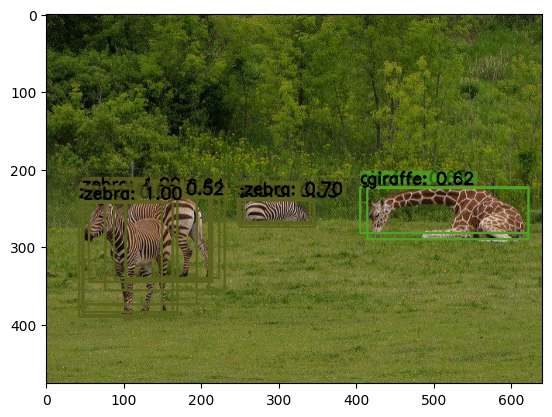

In [48]:
plt.imshow(image)
cv2.imwrite(filename + "_yolo3." + ext, image)

In [49]:
confidences

[0.6346844434738159,
 0.9911091923713684,
 0.8938906192779541,
 0.6215727925300598,
 0.9985881447792053,
 0.5608307123184204,
 0.7890708446502686,
 0.995597779750824,
 0.8802229762077332,
 0.8385530114173889,
 0.9966028928756714,
 0.5241893529891968,
 0.680671751499176,
 0.9988306760787964,
 0.700495183467865]